In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../kaggle_ds/olympics-economics.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


In [35]:
df.describe()

,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


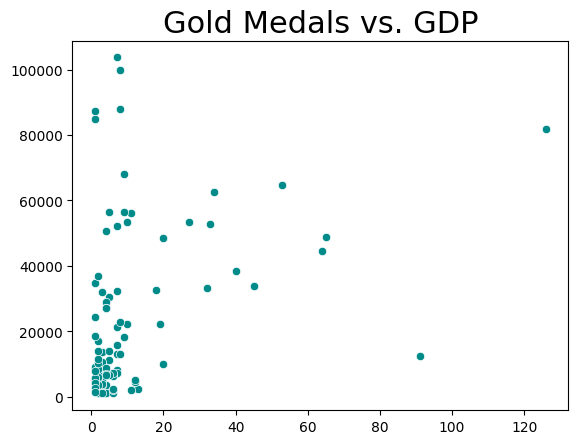

In [53]:
def scatter(x, y, title, xlabel="", ylabel=""):
    sns.scatterplot(x=x, y=y, data=df, color='darkcyan')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=22)
    plt.show()

scatter('total', 'gdp', 'Gold Medals vs. GDP')

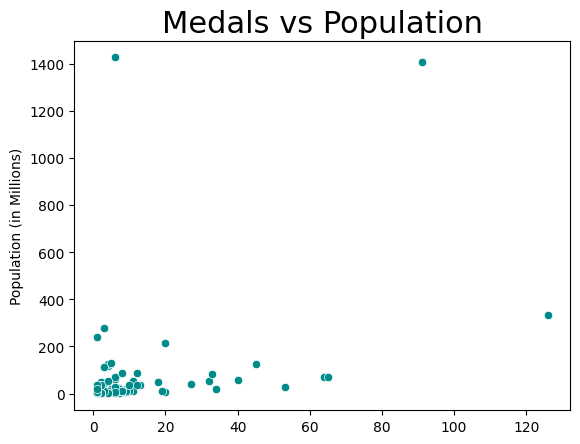

In [54]:
scatter('total', 'population', 'Medals vs Population', ylabel="Population (in Millions)")

In [51]:
df.iloc[df.population.sort_values(ascending=False).index].iloc[-10:, :]

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
71,Moldova,MDA,0,1,3,4,6650.65,2023,2.5
33,Slovenia,SVN,2,1,0,3,32163.51,2023,2.1
72,Kosovo,XKX,0,1,1,2,5943.13,2023,1.8
32,Bahrain,BHR,2,1,1,4,29084.31,2023,1.5
73,Cyprus,CYP,0,1,0,1,34701.44,2023,1.3
74,Fiji,FJI,0,1,0,1,5868.16,2023,0.9
83,Cape Verde,CPV,0,0,1,1,4321.58,2023,0.6
56,St Lucia,LCA,1,1,0,2,13980.09,2023,0.2
61,Dominica,DMA,1,0,0,1,8953.90,2023,0.1
80,Grenada,GRD,0,0,2,2,10463.65,2023,0.1


In [57]:
df['medals_per_capita'] = round((df['total'] / df['population']), 2)
df['medals_per_gdp'] = df['total'] / df['gdp']

In [58]:
df.iloc[df.medals_per_capita.sort_values(ascending=False).index].iloc[:10, :]

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population,medals_per_capita,medals_per_gdp
80,Grenada,GRD,0,0,2,2,10463.65,2023,0.1,20.00,0.000191
56,St Lucia,LCA,1,1,0,2,13980.09,2023,0.2,10.00,0.000143
61,Dominica,DMA,1,0,0,1,8953.90,2023,0.1,10.00,0.000112
10,New Zealand,NZL,10,7,3,20,48527.83,2023,5.2,3.85,0.000412
32,Bahrain,BHR,2,1,1,4,29084.31,2023,1.5,2.67,0.000138
43,Jamaica,JAM,1,3,2,6,6874.20,2023,2.8,2.14,0.000873
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6,1.99,0.000819
13,Hungary,HUN,6,7,6,19,22147.21,2023,9.6,1.98,0.000858
5,Netherlands,NLD,15,7,12,34,62536.73,2023,17.9,1.90,0.000544
23,Georgia,GEO,3,3,1,7,8120.36,2023,3.8,1.84,0.000862


In [59]:
df.iloc[df.medals_per_gdp.sort_values(ascending=False).index].iloc[:10, :]

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population,medals_per_capita,medals_per_gdp
1,China,CHN,40,27,24,91,12614.06,2023,1410.7,0.06,0.007214
16,Kenya,KEN,4,2,5,11,1949.90,2023,55.1,0.20,0.005641
12,Uzbekistan,UZB,8,2,3,13,2496.11,2023,36.4,0.36,0.005208
67,North Korea,PRK,0,2,4,6,1217.00,2023,26.2,0.23,0.004930
46,Ethiopia,ETH,1,3,0,4,1293.78,2023,126.5,0.03,0.003092
68,Kyrgyzstan,KGZ,0,2,4,6,1969.87,2023,7.1,0.85,0.003046
20,Iran,IRN,3,6,3,12,4502.55,2023,89.2,0.13,0.002665
78,Tajikistan,TJK,0,0,3,3,1188.99,2023,10.1,0.30,0.002523
70,India,IND,0,1,5,6,2484.85,2023,1428.6,0.00,0.002415
21,Ukraine,UKR,3,5,4,12,5181.36,2023,37.0,0.32,0.002316


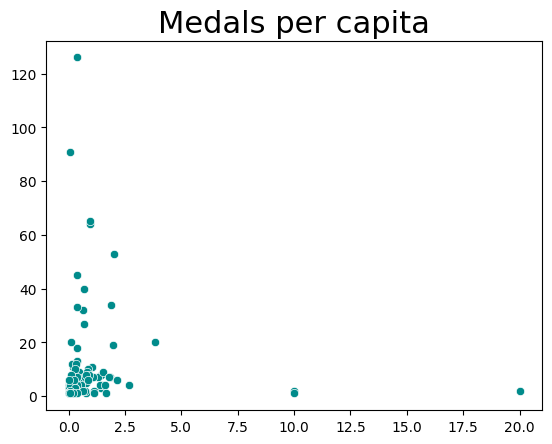

In [62]:
scatter(x='medals_per_capita', y='total', title="Medals per capita")

In [63]:
df.country[df.medals_per_capita > 9]

56    St Lucia
61    Dominica
80     Grenada
Name: country, dtype: object

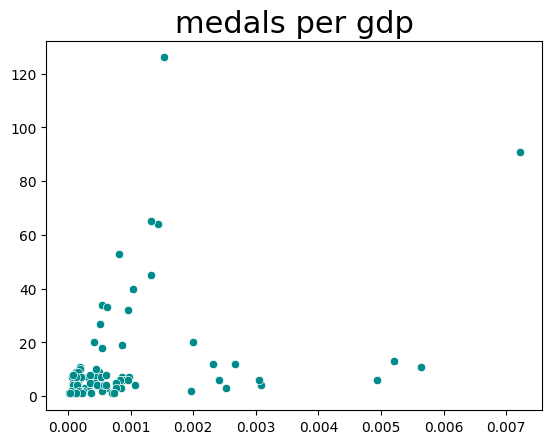

In [64]:
scatter(x='medals_per_gdp', y='total', title="medals per gdp")

In [75]:
df.country[df.medals_per_gdp >= 0.004].tolist()

['China', 'Uzbekistan', 'Kenya', 'North Korea']

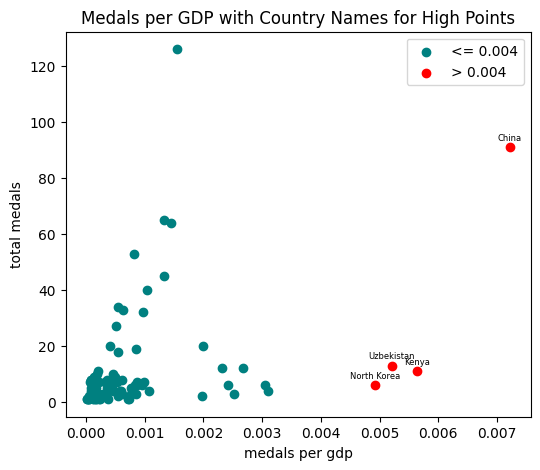

High points goes to ['China', 'Uzbekistan', 'Kenya', 'North Korea']


In [77]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and you have columns 'medals_per_gdp', 'total', and 'country'
plt.figure(figsize=(6,5))

# Plot points where medals_per_gdp is less than or equal to 0.004
plt.scatter(df[df['medals_per_gdp'] <= 0.004]['medals_per_gdp'], 
            df[df['medals_per_gdp'] <= 0.004]['total'], 
            color='teal', label='<= 0.004')

# Plot points where medals_per_gdp is greater than 0.004
plt.scatter(df[df['medals_per_gdp'] > 0.004]['medals_per_gdp'], 
            df[df['medals_per_gdp'] > 0.004]['total'], 
            color='red', label='> 0.004')

# Annotate the points where medals_per_gdp is greater than 0.004
for i in df[df['medals_per_gdp'] > 0.004].index:
    plt.annotate(df['country'][i], 
                 (df['medals_per_gdp'][i], df['total'][i]), 
                 textcoords="offset points", 
                 xytext=(0,5),  # Adjust the offset for better visibility
                 ha='center', 
                 fontsize=6, 
                 color='black')

# Labels and Title
plt.xlabel('medals per gdp')
plt.ylabel('total medals')
plt.title('Medals per GDP with Country Names for High Points')

# Show the legend
plt.legend()

# Display plot
plt.show()
print(f"High points goes to {df.country[df.medals_per_gdp >= 0.004].tolist()}")